In [55]:
import numpy as np
import pandas as pd

In [56]:
df=pd.read_csv("uber.csv")

In [57]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [58]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [60]:
df.shape

(200000, 9)

In [61]:
df['fare_amount'].isnull().sum()


np.int64(0)

In [62]:
df=df[(df['fare_amount']>=0) & (df['fare_amount']<=200)]

In [63]:
df=df[(df['passenger_count']>=1) & (df['passenger_count']<=6)]

In [64]:
df = df[(df['pickup_longitude'] >= -74.25) & (df['pickup_longitude'] <= -73.7)]
df = df[(df['pickup_latitude'] >= 40.5) & (df['pickup_latitude'] <= 40.9)]
df = df[(df['dropoff_longitude'] >= -74.25) & (df['dropoff_longitude'] <= -73.7)]
df = df[(df['dropoff_latitude'] >= 40.5) & (df['dropoff_latitude'] <= 40.9)]


In [65]:
df.shape

(194777, 9)

In [66]:
def haversine(lat1,lon1,lat2,lon2):
  lat1,lon1,lat2,lon2=map(np.radians,[lat1,lon1,lat2,lon2])
  dlat=lat2-lat1
  dlon=lon2-lon1
  a=(np.sin(dlat/2)**2)+(np.cos(lat1)*np.cos(lat2)*(np.sin(dlon/2)**2))
  c=2*np.arcsin(np.sqrt(a))
  r=6371
  return c*r


In [67]:
df['distance_km']=haversine(
    df['pickup_latitude'],df['pickup_longitude'],
    df['dropoff_latitude'],df['dropoff_longitude']
)

In [68]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['hour']=df['pickup_datetime'].dt.hour
df['day_of_week']=df['pickup_datetime'].dt.dayofweek
df['month']=df['pickup_datetime'].dt.month
df['year']=df['pickup_datetime'].dt.year

In [69]:
df=df[(df['distance_km']>0)]

In [70]:
df.shape

(192820, 14)

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'frequency')

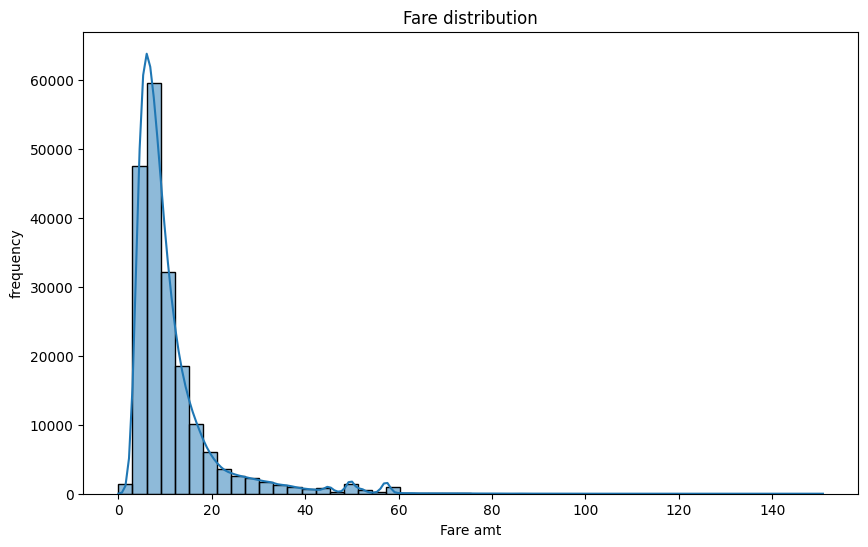

In [72]:
plt.figure(figsize=(10,6))
sns.histplot(df['fare_amount'],bins=50,kde=True)
plt.title("Fare distribution")
plt.xlabel("Fare amt")
plt.ylabel("frequency")


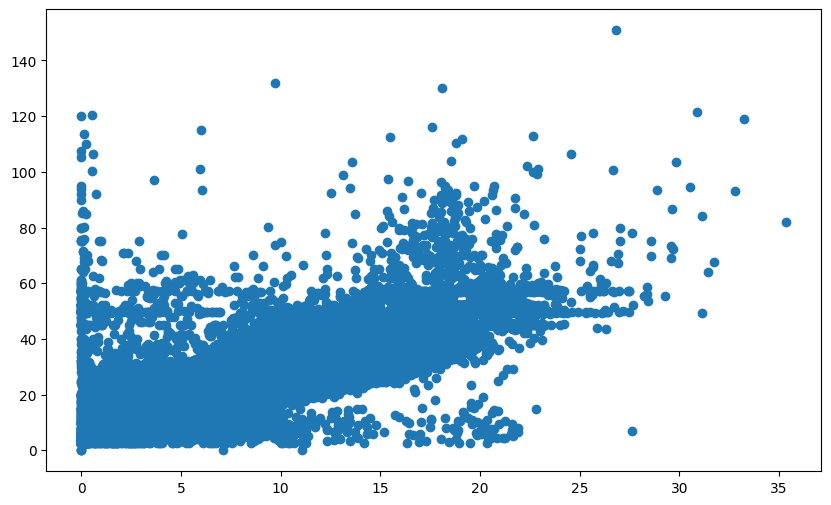

In [73]:
plt.figure(figsize=(10,6))
plt.scatter(df['distance_km'],df['fare_amount'])

In [74]:
features = [
    'fare_amount', 'distance_km', 'passenger_count',
    'hour', 'day_of_week', 'month', 'year'
]

In [75]:
corr_matrix=df[features].corr()

<Axes: >

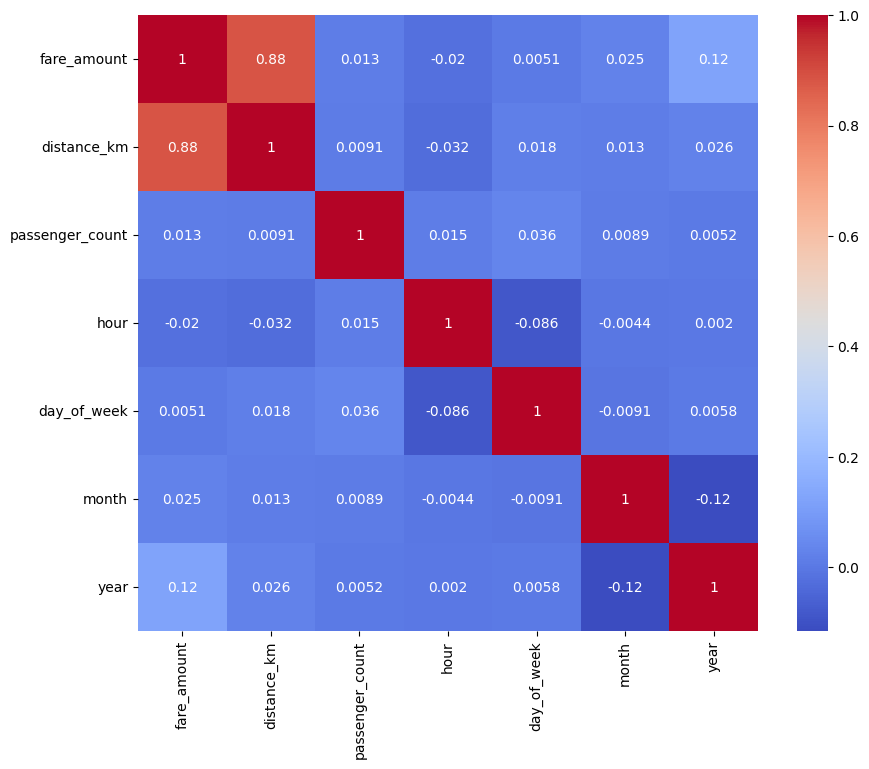

In [76]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm')

In [79]:
feat = ['distance_km', 'passenger_count', 'day_of_week', 'month', 'year']
X = df[feat]
y = df['fare_amount']


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
X_train.shape
X_test.shape[0]

38564

In [85]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

In [86]:
lr_r2 = r2_score(y_test, lr_preds)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
print(f"\nLinear Regression:")
print(f"  R-squared (R2): {lr_r2:.4f}")
print(f"  Root Mean Squared Error (RMSE): ${lr_rmse:.4f}")


Linear Regression:
  R-squared (R2): 0.7977
  Root Mean Squared Error (RMSE): $4.2815


In [87]:
rf_model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=10)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [88]:
rf_r2 = r2_score(y_test, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
print(f"\nRandom Forest Regression:")
print(f"  R-squared (R2): {rf_r2:.4f}")
print(f"  Root Mean Squared Error (RMSE): ${rf_rmse:.4f}")


Random Forest Regression:
  R-squared (R2): 0.8206
  Root Mean Squared Error (RMSE): $4.0318
